<a href="https://colab.research.google.com/github/MartyWeissman/PythonForMathematics/blob/main/Math152_Feb4_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teaching notebook, Math 152, Feb 4, 2021

A few ideas for analyzing "dynamical systems"

The logistic equation is:
$$P_{t+1} = c \cdot \frac{P_t (K - P_t)}{K}.$$
Here $P_t$ represents the population at time $t$.  The constant $K$ is related to the "carrying capacity" -- the maximum population that the environment can support.  The constant $c$ represents a rate of population growth.

An equilibrium will be reached if $P_{t+1} = P_t$, which occurs at 
$$P = K \cdot \frac{c-1}{c}.$$
That is the population at which the dynamics will be "stable" -- as many new creatures are born as die, in each time step.

Let's begin by implementing some formulas as Python functions, with some default values of $K$ and $c$.

In [51]:
def logistic(P, c=1.5, K = 1000):
  return c * P * (K-P) / K

def equilibrium(c=1.5, K=1000):
  return K * (c-1) / c

In [55]:
equilibrium()

333.3333333333333

In [54]:
equilibrium(c=2.0, K=10000)

5000.0

In [56]:
def log_steps(P_start = 5.0, num_steps=10, c=1.5, K=1000):
  P = P_start
  P_list = [P]
  for t in range(num_steps):
    P = logistic(P, c=c, K=K)
    P_list.append(P)
  return P_list

In [59]:
log_steps(P_start=500, num_steps=30)

[500,
 375.0,
 351.5625,
 341.949462890625,
 337.5300415791571,
 335.40526891609437,
 334.3628617491251,
 333.8465076480908,
 333.5895254688961,
 333.4613309494992,
 333.3973075663317,
 333.3653143107788,
 333.3493222878817,
 333.3413274271375,
 333.3373302843772,
 333.33533178489176,
 333.33433255312184,
 333.33383294172995,
 333.33358313715723,
 333.3334582351517,
 333.3333957842191,
 333.33336455877037,
 333.3333489460503,
 333.3333411396914,
 333.33333723651236,
 333.33333528492284,
 333.3333343091281,
 333.33333382123067,
 333.333333577282,
 333.3333334553077,
 333.33333339432056]

In [61]:
equilibrium(c=2.5)

600.0

In [60]:
log_steps(c=2.5)

[5.0,
 12.4375,
 30.707021484375,
 74.41025078983283,
 172.18341341806754,
 356.34071390442597,
 573.405023796275,
 611.5292562036708,
 593.9030625266399,
 602.9555371202948,
 598.5003934406791]

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
def plot_logistic(P_start, num_steps=10, c=1.5, K=1000):
  P_list = log_steps(P_start, num_steps, c, K)
  x_list = range(len(P_list))
  sns.set_style('whitegrid')
  fig,ax = plt.subplots(1,1,figsize=(10,4)) # Create a figure with 1 row and 1 column, 6 inches by 4 inches.
  plt.plot(x_list, P_list, marker='o') # Line plot with dots at time points.
  ax.axhline(equilibrium(c,K), color='red', alpha=0.5)
  ax.set_xlabel('Time')
  ax.set_ylabel('Population')
  plt.show()


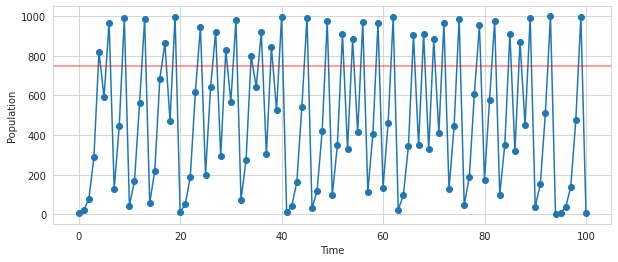

In [74]:
plot_logistic(5, c=4.0, num_steps=100)

In [76]:
import numpy as np
np.arange(2.0,4.0,0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9])

In [84]:
def verhulst(P_start=5.0, num_steps=200, K=1000):
  sns.set_style('whitegrid')
  fig,ax = plt.subplots(1,1,figsize=(8,6))
  for c in np.arange(2.0, 4.0, 0.003):
    eq = equilibrium(c,K)
    plt.scatter(c, eq, color='red', s=3.0)
    P_list = log_steps(P_start, num_steps, c, K)
    y_list = P_list[50:]
    x_list = [c]*len(y_list)
    plt.scatter(x_list, y_list, color='k', s=0.5)
  ax.set_xlabel('Growth rate c')
  ax.axvline(3.5)
  plt.show()

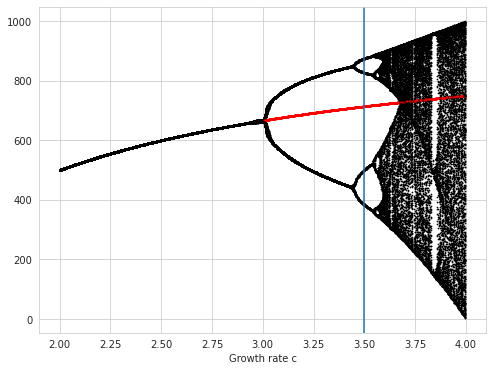

In [85]:
verhulst()

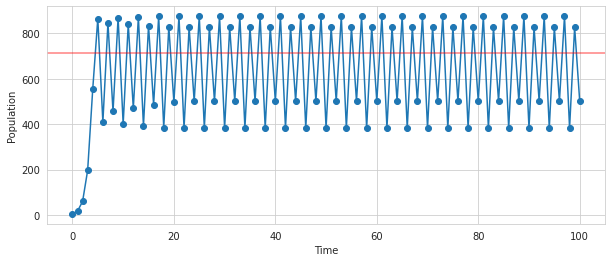

In [83]:
plot_logistic(5, c=3.5, num_steps=100)